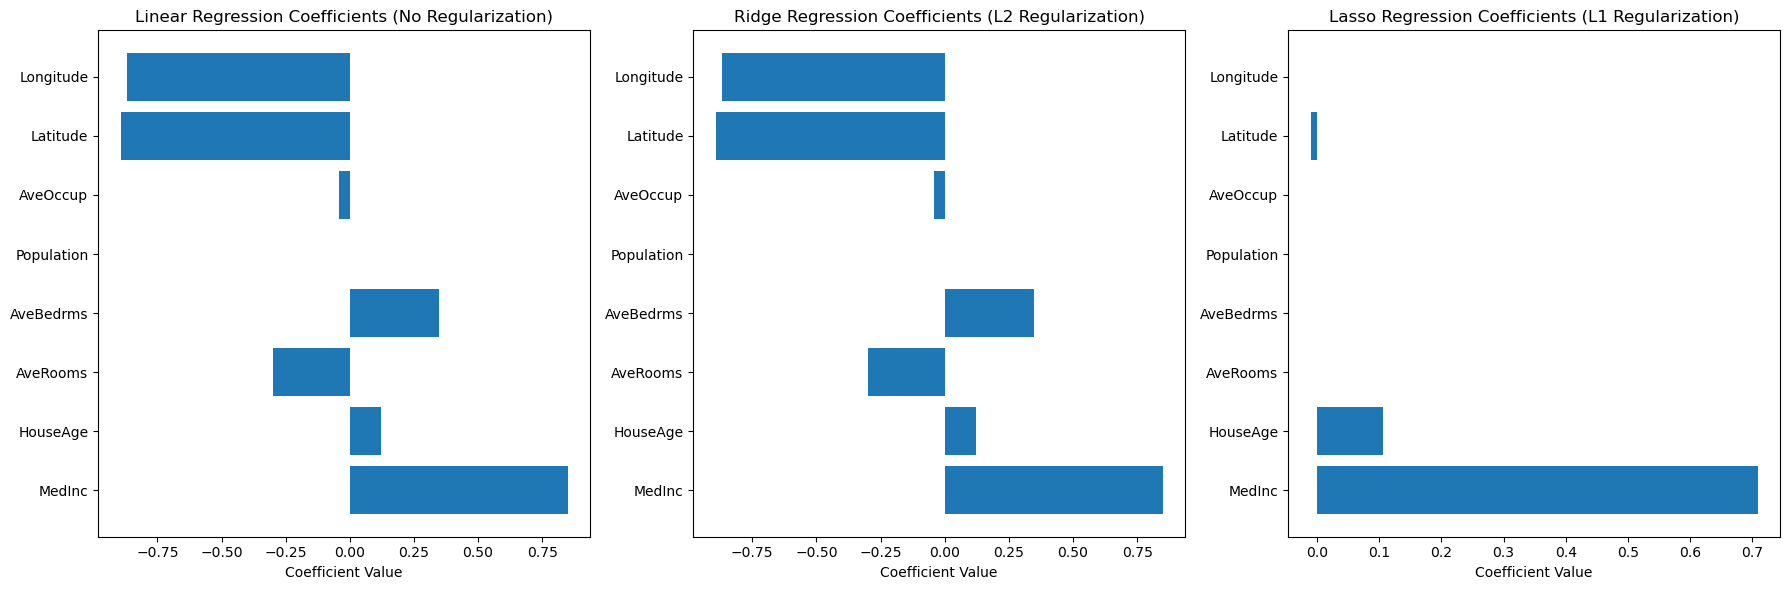

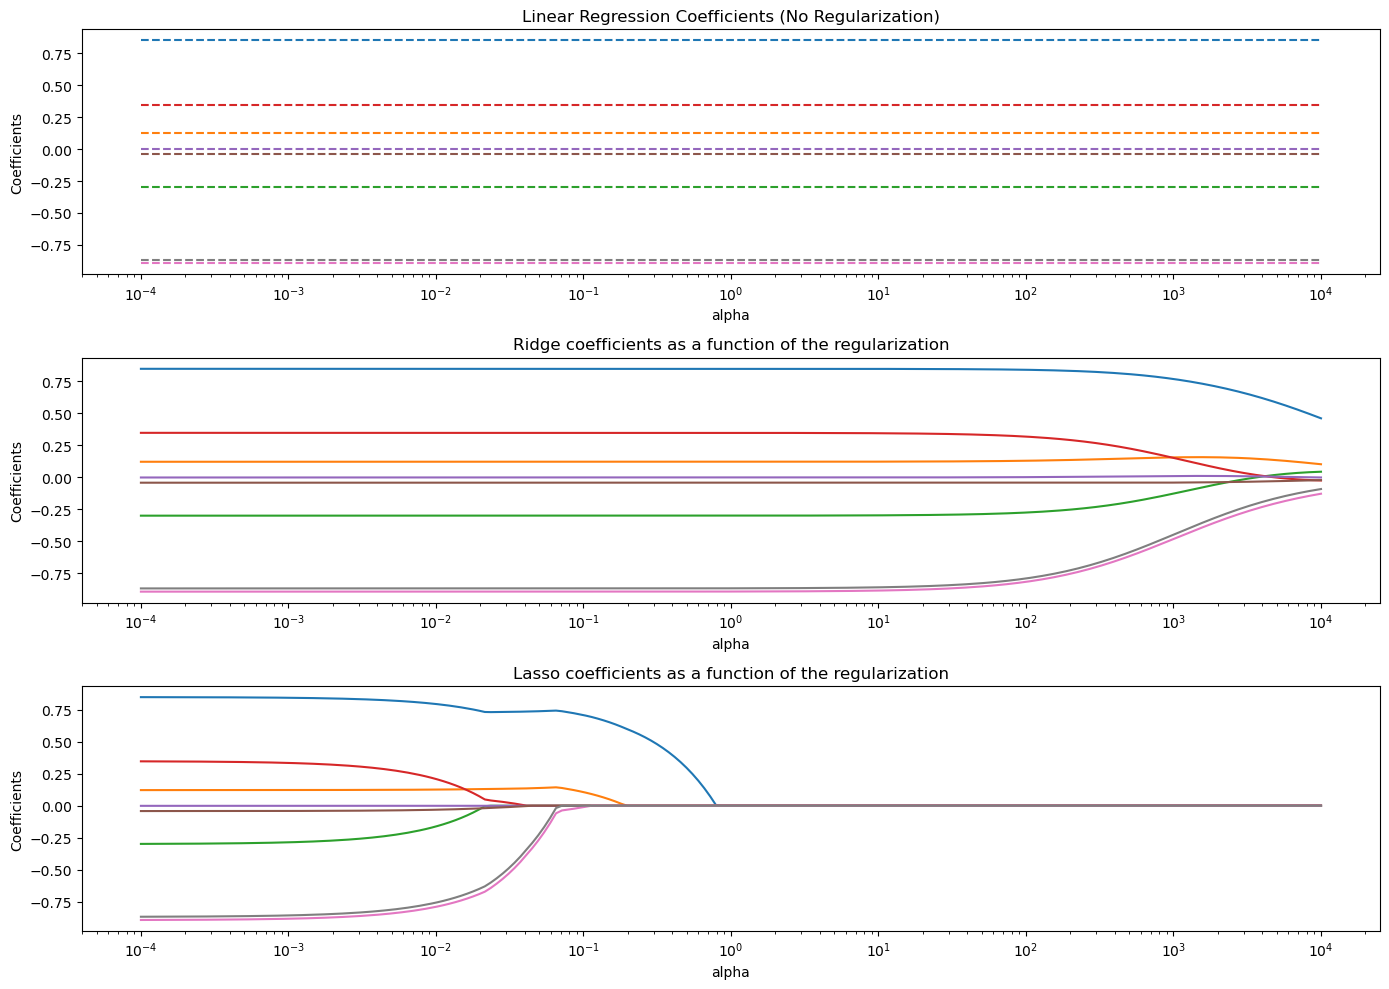

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso

# Load California Housing dataset
data = fetch_california_housing()
X, y = data.data, data.target
feature_names = data.feature_names

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Linear, Ridge, and Lasso regression models
linear_regression = LinearRegression()
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)

linear_regression.fit(X_train_scaled, y_train)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)

# Get coefficients
linear_coefficients = linear_regression.coef_
ridge_coefficients = ridge.coef_
lasso_coefficients = lasso.coef_

# Plot coefficients
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.barh(feature_names, linear_coefficients)
plt.title('Linear Regression Coefficients (No Regularization)')
plt.xlabel('Coefficient Value')

plt.subplot(1, 3, 2)
plt.barh(feature_names, ridge_coefficients)
plt.title('Ridge Regression Coefficients (L2 Regularization)')
plt.xlabel('Coefficient Value')

plt.subplot(1, 3, 3)
plt.barh(feature_names, lasso_coefficients)
plt.title('Lasso Regression Coefficients (L1 Regularization)')
plt.xlabel('Coefficient Value')

plt.tight_layout()
plt.show()

# Plotting effect of regularization on Ridge and Lasso in comparison with Linear Regression
alphas = np.logspace(-4, 4, 200)
ridge_coefs = []
lasso_coefs = []
linear_coefs = np.tile(linear_coefficients, (len(alphas), 1))  # Replicate linear coefficients across all alphas for comparison

for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10000)
    lasso = Lasso(alpha=alpha, max_iter=10000)
    
    ridge.fit(X_train_scaled, y_train)
    lasso.fit(X_train_scaled, y_train)
    
    ridge_coefs.append(ridge.coef_)
    lasso_coefs.append(lasso.coef_)

plt.figure(figsize=(14, 10))

# Linear coefficients (constant)
plt.subplot(3, 1, 1)
plt.plot(alphas, linear_coefs, linestyle='--')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients (No Regularization)')
plt.axis('tight')

# Ridge coefficients vs alpha
plt.subplot(3, 1, 2)
plt.plot(alphas, ridge_coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')

# Lasso coefficients vs alpha
plt.subplot(3, 1, 3)
plt.plot(alphas, lasso_coefs)
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')

plt.tight_layout()
plt.show()
